## Basics

In [1]:
from primitives import Parameters
p = Parameters()
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%%timeit
from ContinuousContract_inv_slow import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p)
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

Value diff: 226.0051642454008
Value diff: 233.3890552945254
Value diff: 221.50323042379887
Value diff: 197.66736501767673
Value diff: 183.9625579022652
Value diff: 161.91416280042506
Value diff: 141.26022358079928
Value diff: 122.02990677606556
Value diff: 122.61747118091307
Value diff: 87.30261341617182
Value diff: 96.65582435772541
Value diff: 63.11377814342222
Value diff: 58.87414221631917
Value diff: 54.90092838636872
Value diff: 51.17614821697089
Value diff: 47.68020662768441
Value diff: 44.40150574024159
Value diff: 41.324143631357515
Value diff: 38.43564459921174
Value diff: 35.723975751121884
Value diff: 33.410929849863976
Value diff: 32.56016936119062
Value diff: 31.733543216066096
Value diff: 30.930291081402174
Value diff: 30.14967865897492
Value diff: 29.390996742427347
Value diff: 28.653560309602085
Value diff: 27.93670764885445
Value diff: 27.23979951804938
Value diff: 28.777291471159117
Value diff: 30.27984618202919
Value diff: 25.26267013621512
Value diff: 28.86518614753

In [3]:
#print("Before first call:", cc.__dict__)
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi)=cc.J()
#print("After first call:", cc.__dict__)

Jpi-Ji max: 653.1832727874537
Value diff: 196.15175284451698
Jpi-Ji max: 13110.359465165513
Value diff: 221.52124720707945
Jpi-Ji max: 13688.51670307934
Value diff: 213.8053573812507
Jpi-Ji max: 14926.137048241188
Value diff: 191.82650700181284
Jpi-Ji max: 16271.528101486016
Value diff: 159.3504525758466
Jpi-Ji max: 17683.746437912258
Value diff: 155.14103000971318
Jpi-Ji max: 19128.163169631007
Value diff: 114.81437687524215
Jpi-Ji max: 21186.440743792384
Value diff: 110.81141879736725
Jpi-Ji max: 24015.380810780865
Value diff: 100.15970793541612
Jpi-Ji max: 26969.40144829767
Value diff: 85.77477700347436
Jpi-Ji max: 30710.607653713218
Value diff: 77.3885131894333
Jpi-Ji max: 35994.922299398735
Value diff: 63.07314390569252
Jpi-Ji max: 43582.52614621644
Value diff: 58.835837251610315
Jpi-Ji max: 51615.67099697064
Value diff: 54.86236463196741
Jpi-Ji max: 59077.689546990674
Value diff: 51.13544364325787
Jpi-Ji max: 67424.14126617483
Value diff: 47.63787482733835
Jpi-Ji max: 73854.87955

In [22]:
(cc.fun_prod.min()-cc.fun_prod.max())/(1-p.beta) #Bruh. Paying THE HIGHEST wage all the time at THE LOWEST productivity still yields better value than what the polynomial predicts.
#Yeah, I don't see why I should keep using the parametric approximation.
#Maybe it's better for the middle values or something???
#I dunno man, this stuff's weird 

-909.6865123407565

In [4]:
from ContinuousContract_inv import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p) #this is continuous contract with FOC that writes the expectation as a function of today's value
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

In [4]:
from ContinuousContract_inv_avgw import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p) 
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

In [ ]:
#(ccinv_J,ccinv_W,ccinv_Wstar)=cc.J() #wtf??? this takes SO MUCH MORE TIME!!!

# Plots

In [4]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

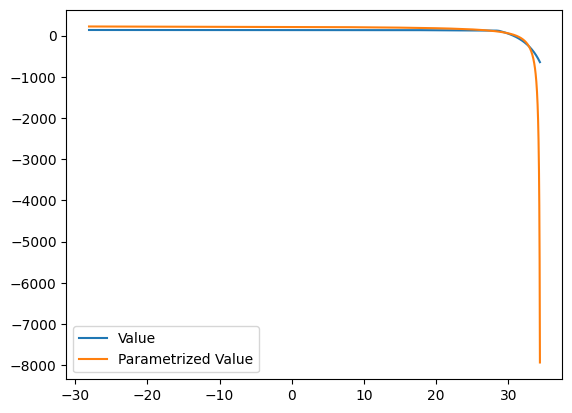

In [5]:
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Value')
plt.plot(cc_W[p.z_0-1, :], cc_Jpi[p.z_0-1, :], label='Parametrized Value')
plt.legend()
plt.show()

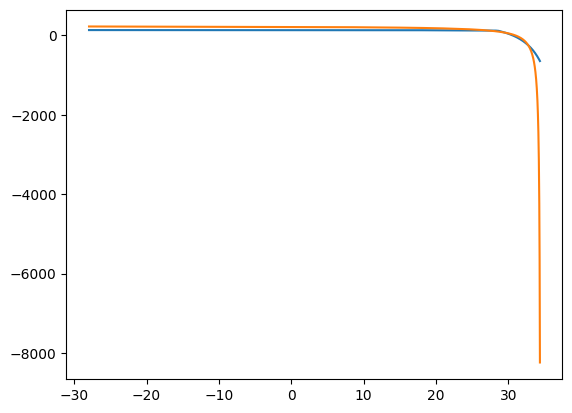

In [5]:
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Value')
plt.plot(cc_W[p.z_0-1, :], cc_Jpi[p.z_0-1, :], label='Parametrized Value')
plt.legend()
plt.show()

Text(0, 0.5, 'Future value')

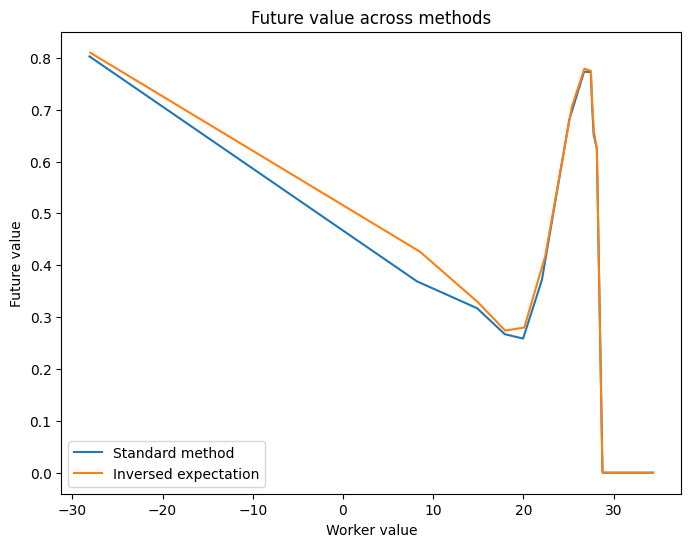

In [6]:
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_Wstar[p.z_0-1, :]-cc_W[p.z_0-1, :], label='Standard method')
plt.plot(ccinv_W[p.z_0-1,:], ccinv_Wstar[p.z_0-1, :]-ccinv_W[p.z_0-1,:], label='Inversed expectation')
plt.legend()
# Add titles and labels
plt.title('Future value across methods')
plt.xlabel('Worker value')
plt.ylabel('Future value')

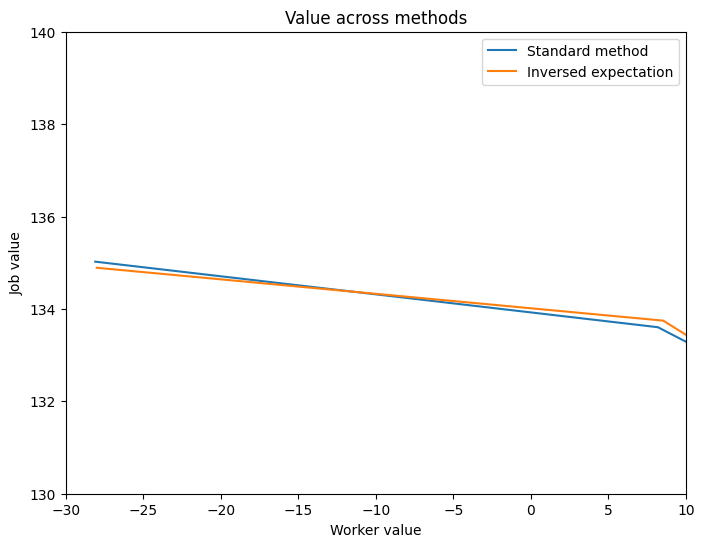

In [9]:
# Create a figure with a specific size
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Standard method')
plt.plot(ccinv_W[p.z_0-1,:], ccinv_J[p.z_0-1, :], label='Inversed expectation')

# Add titles and labels
plt.title('Value across methods')
plt.xlabel('Worker value')
plt.ylabel('Job value')

# Optionally set x and y limits
# plt.xlim([-30, 30])
# plt.ylim([150, 200])

# Add legend
plt.legend()

# Save the plot to a file in the specified directory
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods.png'), bbox_inches='tight')  # Save as PNG


# Optionally set x and y limits
plt.xlim([-30, 10])
plt.ylim([130, 140])
# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods zoom.png'), bbox_inches='tight')  # Save as PNG

# Show the plot (optional)
plt.show()

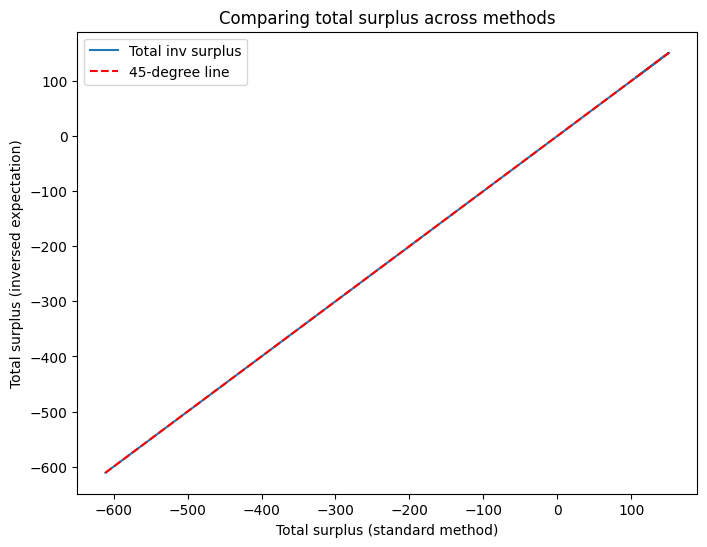

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))#This creates a figure and a set of subplots with a specific size. The size is specified in inches (width, height).

# Plot the original data
ax.plot(cc_W[p.z_0-1,:]+cc_J[p.z_0-1,:], ccinv_W[p.z_0-1,:]+ccinv_J[p.z_0-1,:], label='Total inv surplus')

# Calculate the range for the 45-degree line
x_vals = cc_W[p.z_0-1,:] + cc_J[p.z_0-1,:]
y_vals = ccinv_W[p.z_0-1,:] + ccinv_J[p.z_0-1,:]
min_val = min(min(x_vals), min(y_vals))
max_val = max(max(x_vals), max(y_vals))

# Add the 45-degree line
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='45-degree line')

# Add titles and labels
ax.set_title('Comparing total surplus across methods')
ax.set_xlabel('Total surplus (standard method)')
ax.set_ylabel('Total surplus (inversed expectation)')
ax.legend()

# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Total surplus comparison.png'), bbox_inches='tight')  # Save as PNG
#    plt.savefig(os.path.join(output_dir,'Total surplus comparison.pdf'), bbox_inches='tight')  # Save as PDF

# Show the plot
plt.show()